In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from PIL import Image

In [39]:
DATASET_PATH = '../data/final_sampled_data.parquet'
GEO_DATASET_PATH = '../data/NYC_Taxi_Zones_Centroids_ObjectID.csv'

In [40]:
raw_df =  pd.read_parquet(DATASET_PATH)
df = pd.read_csv(GEO_DATASET_PATH)

In [41]:
raw_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,month,year
0,2,2020-02-19 19:37:08,2020-02-19 19:42:59,1.0,1.24,1.0,N,237,236,2,...,1.0,0.5,0.00,0.0,0.3,10.30,2.5,NaN,2,2019
1,2,2020-02-27 12:17:32,2020-02-27 12:26:00,1.0,0.86,1.0,N,237,237,2,...,0.0,0.5,0.00,0.0,0.3,10.30,2.5,NaN,2,2019
2,1,2020-02-06 14:38:29,2020-02-06 14:44:46,1.0,1.40,1.0,N,48,143,1,...,2.5,0.5,2.00,0.0,0.3,12.30,2.5,NaN,2,2019
3,1,2020-02-01 12:10:41,2020-02-01 12:22:25,1.0,1.80,1.0,N,142,140,1,...,2.5,0.5,2.56,0.0,0.3,15.36,2.5,NaN,2,2019
4,2,2020-02-14 19:18:29,2020-02-14 19:37:45,3.0,1.85,1.0,N,246,137,1,...,1.0,0.5,3.36,0.0,0.3,20.16,2.5,NaN,2,2019


In [42]:
df.head()

,objectid,centroid_lon,centroid_lat
0,1,-74.174000,40.691831
1,2,-73.831299,40.616745
2,3,-73.847422,40.864474
3,4,-73.976968,40.723752
4,5,-74.188484,40.552659


In [43]:
zone_count = raw_df["PULocationID"].value_counts()

df_merged = df.merge(zone_count, left_on='objectid', right_index=True)
df_merged.head()

,objectid,centroid_lon,centroid_lat,count
0,1,-74.174000,40.691831,178
1,2,-73.831299,40.616745,4
2,3,-73.847422,40.864474,54
3,4,-73.976968,40.723752,3152
4,5,-74.188484,40.552659,4


In [44]:
df_merged.describe()

,objectid,centroid_lon,centroid_lat,count
count,249.000000,249.000000,249.000000,249.000000
mean,130.389558,-73.923588,40.729773,7423.461847
std,76.735701,0.088274,0.082536,16666.860943
min,1.000000,-74.233534,40.525495,2.000000
25%,64.000000,-73.981532,40.676154,54.000000
50%,130.000000,-73.931888,40.729506,164.000000
75%,197.000000,-73.864901,40.780436,2082.000000
max,263.000000,-73.711026,40.899529,81602.000000


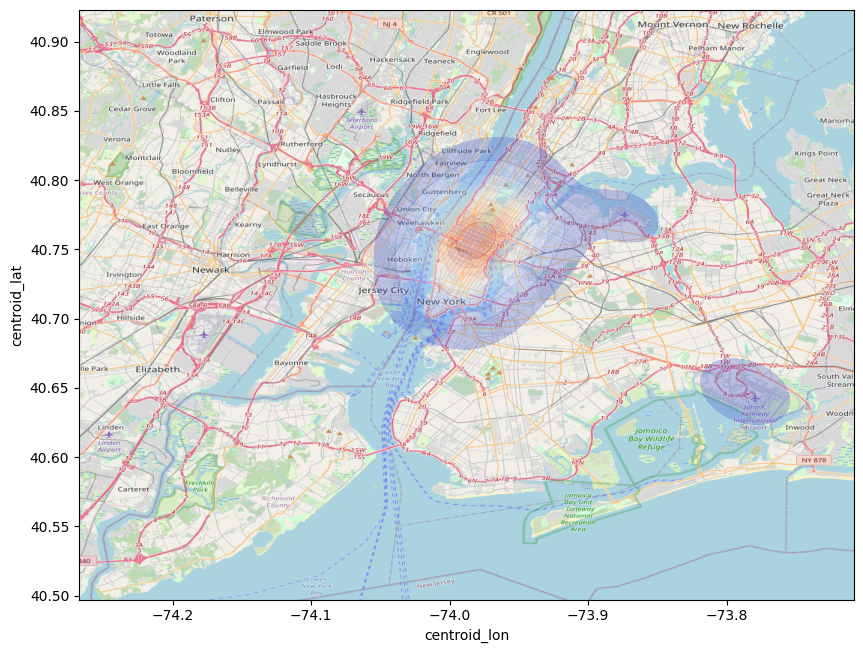

In [45]:
# Cargar la imagen del mapa de Nueva York
# Necesitas tener una imagen del mapa de Nueva York que corresponda a la misma área y escala
# de tus datos. Asegúrate de reemplazar '/path/to/new_york_map.png' con la ruta correcta.
ny_map = Image.open('../data/map.png')

# Crear una figura y un eje para el mapa de calor
fig, ax = plt.subplots(figsize=(10, 10))

# Colocar el mapa de Nueva York como fondo
ax.imshow(ny_map, extent=[-74.2676, -73.7080, 40.4971, 40.9229])

# Crear el mapa de calor
sns.kdeplot(
    x=df_merged['centroid_lon'],
    y=df_merged['centroid_lat'],
    weights=df_merged['count'],
    cmap="coolwarm",
    fill=True,
    alpha=0.3,
    ax=ax
)

# Establecer límites para coincidir con los del mapa
ax.set_xlim(-74.2676, -73.7080)
ax.set_ylim(40.4971, 40.9229)
ax.grid(False)

In [46]:
df_merged.count

<bound method DataFrame.count of      objectid  centroid_lon  centroid_lat  count
0           1    -74.174000     40.691831    178
1           2    -73.831299     40.616745      4
2           3    -73.847422     40.864474     54
3           4    -73.976968     40.723752   3152
4           5    -74.188484     40.552659      4
..        ...           ...           ...    ...
258       256    -73.959905     40.710880    908
259       259    -73.852215     40.897932     58
260       260    -73.906306     40.744235    844
261       261    -74.013023     40.709139   9850
262       262    -73.946510     40.775932  25510

[249 rows x 4 columns]>

In [47]:
zone_freq = np.array(df_merged["count"])
zone_freq = zone_freq.reshape(-1, 1)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(zone_freq)

# Escalar los datos normalizados al rango [0, 1] con MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(scaled_data)

df_merged["count"] = scaled_data_minmax.reshape(-1,)

In [49]:
df_merged.head()

,objectid,centroid_lon,centroid_lat,count
0,1,-74.174000,40.691831,0.002157
1,2,-73.831299,40.616745,0.000025
2,3,-73.847422,40.864474,0.000637
3,4,-73.976968,40.723752,0.038603
4,5,-74.188484,40.552659,0.000025


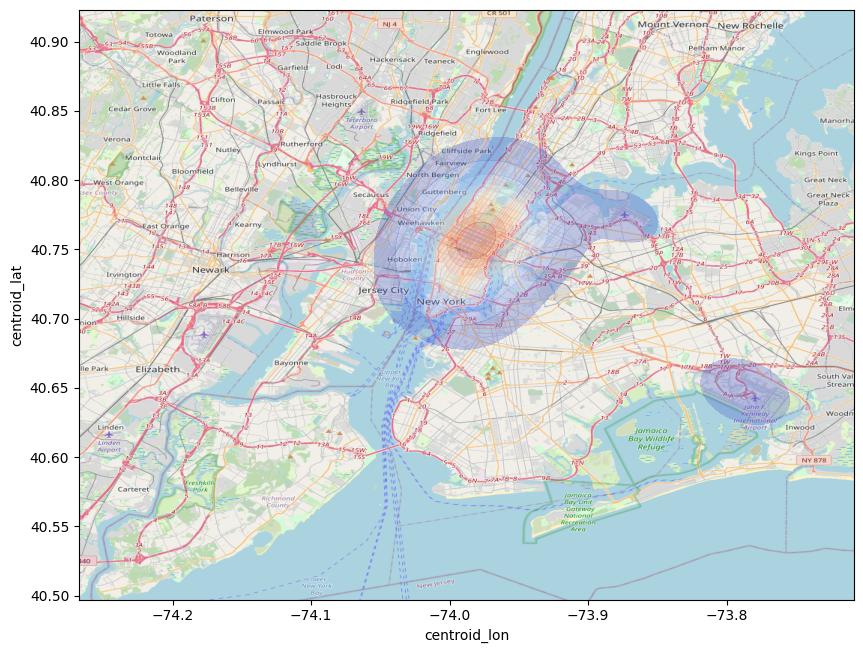

In [50]:
# Crear una figura y un eje para el mapa de calor
fig, ax = plt.subplots(figsize=(10, 10))

# Colocar el mapa de Nueva York como fondo
ax.imshow(ny_map, extent=[-74.2676, -73.7080, 40.4971, 40.9229])

# Crear el mapa de calor
sns.kdeplot(
    x=df_merged['centroid_lon'],
    y=df_merged['centroid_lat'],
    weights=df_merged['count'],
    cmap="coolwarm",
    fill=True,
    alpha=0.3,
    ax=ax
)

# Establecer límites para coincidir con los del mapa
ax.set_xlim(-74.2676, -73.7080)
ax.set_ylim(40.4971, 40.9229)
ax.grid(False)